# Part 2

1. The rate in which drivers go through the toll gate would measure its success since the number of visits to the toll gate directly relates with their availability in both cities.

2. There are many ways of approaching, but for simplicity, I would alternate so that the company would reimburse the toll costs every other week. The remaining weeks would serve as the control group. I aim for this experiment to last several months. After that, I would gather up the data during that period to conduct an A/B test and compare the data between the toll-free periods and the regular periods.

# Part 3

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import json

In [2]:
uc_df = pd.read_json('ultimate_data_challenge.json')
uc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
uc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
uc_df['last_trip_date'].sort_values()

31425    2014-01-01
10729    2014-01-01
40336    2014-01-01
34828    2014-01-01
37295    2014-01-01
            ...    
45126    2014-07-01
38651    2014-07-01
14473    2014-07-01
22735    2014-07-01
45357    2014-07-01
Name: last_trip_date, Length: 50000, dtype: object

The latest data implies that it was taken on 2014-07-01, 6 months later. Thus, those who took a trip on or after 2014-06-01 must be considered "active".

In [5]:
uc_df['user_is_active'] = uc_df['last_trip_date'] >= '2014-06-01'
uc_df['user_is_active']

0         True
1        False
2        False
3         True
4        False
         ...  
49995     True
49996    False
49997    False
49998    False
49999    False
Name: user_is_active, Length: 50000, dtype: bool

In [6]:
uc_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


The user_is_active column indicates whether a user retained or not. In other words, it indicates whether a user took a trip within the last 30 days.

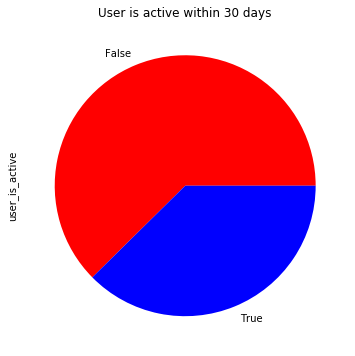

In [7]:
uc_df['user_is_active'].value_counts().plot.pie(figsize=(6,6), title='User is active within 30 days',
                                               colors=['red', 'blue'])

In [8]:
print('Retention rate (as of 2014-07-01): {}%'.format(
    round(len(uc_df[uc_df['user_is_active'] == True]) / 50000. * 100, 1)))

Retention rate (as of 2014-07-01): 37.6%


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1125bca90>,
      dtype=object)

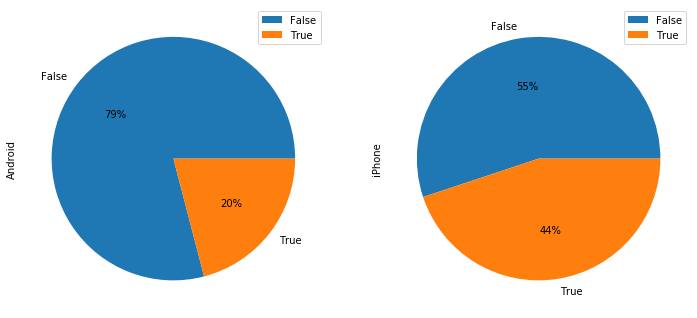

In [9]:
pd.crosstab(uc_df.user_is_active, uc_df.phone).plot.pie(subplots=True, figsize=(12,6), autopct='%d%%')

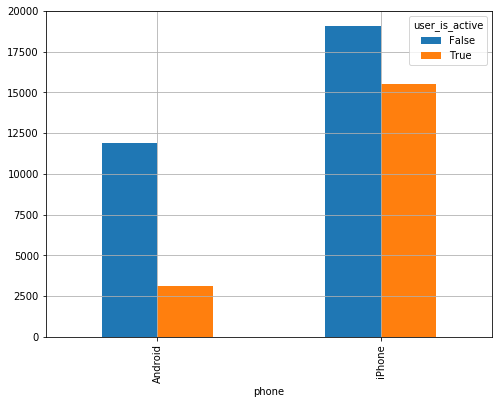

In [10]:
pd.crosstab(uc_df.phone, uc_df.user_is_active).plot.bar(figsize=(8,6), grid=True)

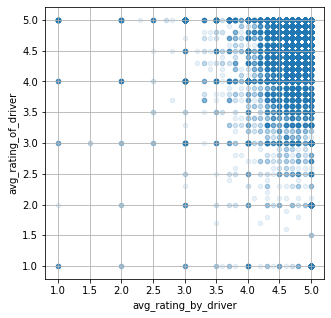

In [11]:
uc_df.plot(kind='scatter', x='avg_rating_by_driver', y='avg_rating_of_driver',
           figsize=(5,5), grid=True, alpha=0.1)

In [12]:
pd.crosstab(uc_df.user_is_active, uc_df.ultimate_black_user)

ultimate_black_user,False,True
user_is_active,,
False,21839,9357
True,9307,9497


In [13]:
uc_df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

## Predictive model for user retention

In [14]:
pd.Timestamp('2014-07-01') - pd.Timestamp('2014-01-01')

Timedelta('181 days 00:00:00')

In [15]:
start_date = pd.Timestamp('2014-01-01')
days_since2014 = lambda t: pd.Timedelta(pd.Timestamp(t) - start_date, unit='day').days

pd.Series(uc_df.signup_date.apply(days_since2014))

0        24
1        28
2         5
3         9
4        26
         ..
49995    24
49996    23
49997    30
49998    13
49999    17
Name: signup_date, Length: 50000, dtype: int64

In [16]:
# columns of number of days since 2014-01-01
uc_df['signup_days2014']    = uc_df.signup_date.apply(days_since2014)
uc_df['last_trip_days2014'] = uc_df.last_trip_date.apply(days_since2014)

uc_df[['signup_days2014', 'last_trip_days2014']]

,signup_days2014,last_trip_days2014
0,24,167
1,28,124
2,5,6
3,9,179
4,26,73
...,...,...
49995,24,155
49996,23,24
49997,30,141
49998,13,14


In [17]:
round(uc_df.avg_rating_of_driver.dropna().mean(), 1)

4.6

In [18]:
uc_df_new = uc_df.copy()
arod_avg = round(uc_df_new.avg_rating_of_driver.dropna().mean(), 1)
arbd_avg = round(uc_df_new.avg_rating_by_driver.dropna().mean(), 1)

print(arod_avg, arbd_avg)

4.6 4.8


In [19]:
uc_df_new.avg_rating_of_driver.fillna(arod_avg, inplace=True)
uc_df_new.phone.fillna('Unknown', inplace=True)
uc_df_new.avg_rating_by_driver.fillna(arbd_avg, inplace=True)

In [20]:
uc_df_new.drop(columns=['signup_date', 'last_trip_date']).head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,24,167
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False,28,124
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,5,6
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,9,179
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False,26,73


In [21]:
# Assume all users started using on January XY, 2014 -> July XY, 2014 be 6 months
# Both Jan and July have 31 days
num_days_6months = pd.Timedelta(pd.Timestamp('2014-07-01') - start_date, unit='day').days
num_days_6months

181

In [22]:
uc_df_new.signup_days2014.describe()

count    50000.00000
mean        15.54468
std          8.75422
min          0.00000
25%          8.00000
50%         16.00000
75%         23.00000
max         30.00000
Name: signup_days2014, dtype: float64

Since max = 30, which implies January 31, implying that every user has signed up on January. Thus, it's safe to say 181 days from 2014-01-XX will be 2014-07-XX.

In [23]:
uc_df_new[uc_df_new.user_is_active == True].sort_values('avg_dist', ascending=False).head(15)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014
20701,Astapor,0,2014-01-25,4.6,1.0,2014-06-26,Android,0.0,False,100.0,160.96,4.8,True,24,176
22290,Astapor,0,2014-01-12,5.0,1.0,2014-06-26,iPhone,0.0,True,100.0,79.34,5.0,True,11,176
47595,King's Landing,0,2014-01-25,5.0,1.0,2014-06-09,iPhone,0.0,True,0.0,77.13,5.0,True,24,159
42835,Winterfell,0,2014-01-10,5.0,1.0,2014-06-28,Android,0.0,False,100.0,70.48,5.0,True,9,178
43587,Astapor,0,2014-01-16,5.0,1.0,2014-06-30,iPhone,0.0,True,0.0,61.12,5.0,True,15,180
14942,Astapor,0,2014-01-17,4.6,1.0,2014-06-01,Android,0.0,False,0.0,55.87,5.0,True,16,151
22798,King's Landing,0,2014-01-16,5.0,1.0,2014-06-27,iPhone,0.0,False,100.0,51.38,5.0,True,15,177
29060,King's Landing,0,2014-01-19,4.6,1.0,2014-06-17,iPhone,0.0,False,100.0,49.66,5.0,True,18,167
16365,King's Landing,2,2014-01-20,4.6,1.0,2014-06-13,Android,0.0,False,100.0,48.48,5.0,True,19,163
41217,King's Landing,0,2014-01-14,5.0,1.0,2014-06-20,iPhone,0.0,False,100.0,47.62,5.0,True,13,170


In [24]:
uc_df_new = uc_df_new.drop(['signup_date', 'last_trip_date'], axis=1)
uc_df_new.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,24,167
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False,28,124
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,5,6
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,9,179
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False,26,73


In [25]:
uc_df_new.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,24,167
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False,28,124
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,5,6
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,9,179
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False,26,73


In [26]:
uc_df_new['days_lasted'] = 181 - uc_df_new.signup_days2014
uc_df_new.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014,days_lasted
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,True,24,167,157
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,False,28,124,153
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,False,5,6,176
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,True,9,179,172
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,False,26,73,155


Let's try with KNeighbors.

First, make new column telling how long one has been a user. Name the column days_lasted.
Next, convert all data to numerical data (e.g. `["King's Landing", "Astapor", "Winterfell"] -> [1, 2, 3]`)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
city_u = uc_df_new.city.unique()
phone_u = uc_df_new.phone.unique()

In [29]:
uc_df_new.city = uc_df_new.city.apply(lambda t: np.where(city_u == t)[0][0] + 1)
uc_df_new.phone = uc_df_new.phone.apply(lambda p: np.where(phone_u == p)[0][0] + 1)

In [30]:
uc_df_new.ultimate_black_user = uc_df_new.ultimate_black_user.apply(lambda u: int(u))
uc_df_new.user_is_active = uc_df_new.user_is_active.apply(lambda a: int(a))

In [31]:
uc_df_new.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014,days_lasted
0,1,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,1,24,167,157
1,2,0,5.0,1.00,2,0.0,0,50.0,8.26,5.0,0,28,124,153
2,2,3,4.3,1.00,1,0.0,0,100.0,0.77,5.0,0,5,6,176
3,1,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1,9,179,172
4,3,14,4.4,1.19,2,11.8,0,82.4,3.13,4.9,0,26,73,155


In [32]:
y = uc_df_new.user_is_active.values
X = uc_df_new.drop('user_is_active', axis=1).values

In [33]:
knn = KNeighborsClassifier().fit(X,y)

In [34]:
print(knn.score(X,y))

0.99554


In [35]:
uc_df_test = uc_df_new.copy()
uc_df_test.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014,days_lasted
0,1,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,1,24,167,157
1,2,0,5.0,1.00,2,0.0,0,50.0,8.26,5.0,0,28,124,153
2,2,3,4.3,1.00,1,0.0,0,100.0,0.77,5.0,0,5,6,176
3,1,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1,9,179,172
4,3,14,4.4,1.19,2,11.8,0,82.4,3.13,4.9,0,26,73,155


In [36]:
uc_df_test.days_lasted = 181
uc_df_test.head(20)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_is_active,signup_days2014,last_trip_days2014,days_lasted
0,1,4,4.7,1.10,1,15.4,1,46.2,3.67,5.0,1,24,167,181
1,2,0,5.0,1.00,2,0.0,0,50.0,8.26,5.0,0,28,124,181
2,2,3,4.3,1.00,1,0.0,0,100.0,0.77,5.0,0,5,6,181
3,1,9,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1,9,179,181
4,3,14,4.4,1.19,2,11.8,0,82.4,3.13,4.9,0,26,73,181
5,3,2,3.5,1.00,1,0.0,1,100.0,10.56,5.0,1,8,156,181
6,2,1,4.6,1.00,2,0.0,0,100.0,3.95,4.0,0,23,24,181
7,3,2,5.0,1.00,1,0.0,0,100.0,2.04,5.0,0,27,28,181
8,3,2,4.5,1.00,2,0.0,0,100.0,4.36,5.0,0,20,31,181
9,3,1,4.6,1.00,2,0.0,0,0.0,2.37,5.0,0,2,4,181


In [37]:
X_test = uc_df_test.drop('user_is_active', axis=1).values
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [38]:
y_pred[:20]

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1])

The model attained an accuracy score of 99.54%.

The array `y_pred` is the prediction for each user whether they will be active at the time of their 6th month as a user. ~~Now let's determine the feature importance for the predictions made by the model.~~

EDIT: KNN has no defined way of measuring feature importance, but we can try estimating.

In [39]:
dir(knn)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

Inspired from:
https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier


In [53]:
_, indices = knn.kneighbors()

In [54]:
indices[0]

array([ 8684, 49012, 35279, 17537, 16972])

In [90]:
A = np.matrix([X[0] - X[i] for i in indices[0]])

In [91]:
normA = A / np.linalg.norm(A)

In [93]:
norm = np.array([np.linalg.norm(normA[:, f]) for f in range(X.shape[1])])
norm

array([0.41894919, 0.2323912 , 0.12075401, 0.01497076, 0.1161956 ,
       0.15327252, 0.20125668, 0.40883682, 0.24261518, 0.08133692,
       0.28461993, 0.53247512, 0.28461993])

In [89]:
X.shape

(50000, 13)

In [98]:
def feat_dist(idx,nn):
    A = np.matrix([X[idx] - X[j] for j in nn])
    normA = A / np.linalg.norm(A)
    return np.array([np.linalg.norm(normA[:, f]) for f in range(X.shape[1])])

In [99]:
neigh_dist = np.matrix([feat_dist(i,v) for i,v in enumerate(indices)])
neigh_dist

matrix([[0.41894919, 0.2323912 , 0.12075401, ..., 0.28461993, 0.53247512,
         0.28461993],
        [0.14788507, 0.18112148, 0.23845751, ..., 0.44365521, 0.52285268,
         0.44365521],
        [0.33597363, 0.58192341, 0.25029472, ..., 0.        , 0.47513847,
         0.        ],
        ...,
        [0.37611996, 0.        , 0.21606447, ..., 0.26595698, 0.37611996,
         0.26595698],
        [0.18261528, 0.31629894, 0.502109  , ..., 0.        , 0.258257  ,
         0.        ],
        [0.38031337, 0.21957403, 0.21625534, ..., 0.21957403, 0.43914805,
         0.21957403]])

In [105]:
nd_trans = neigh_dist.T
feature_dist = np.array([np.linalg.norm(f) for f in nd_trans])
feature_dist

array([62.21154585, 71.5709578 , 46.6287671 , 10.63448066, 47.12549201,
       49.66731748, 45.89579415, 59.430302  , 95.97745539, 35.41414445,
       68.519023  , 92.40347247, 68.519023  ])

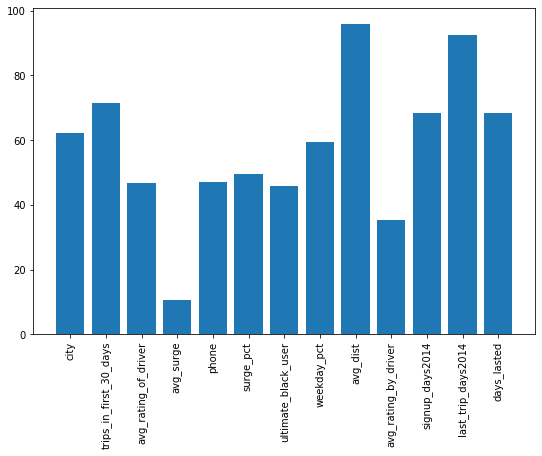

In [111]:
plt.figure(figsize=(9,6))
plt.bar(uc_df_test.drop('user_is_active', axis=1).columns, feature_dist)
plt.xticks(uc_df_test.drop('user_is_active', axis=1).columns, rotation=90)
plt.show()

The bar graph represents the distances of neighbors per feature. The smaller the distance, the more important the feature is. In this case, it looks like the `avg_surge` is the most important, followed by `avg_rating_by_driver` in predicting whether a user will retain at their 6th month of usage.

I was considering using any of the regression models, but since this aims to build a classifying model, it would not make much sense to consider intercepts. Nevertheless, Logistic Regression is another reasonable method to use, since it can also be used as a classifier, and it also contains a `feature_importance` metric, which would make determining feature importance so much easier than KNN, which does not have such attribute.

## Conclusion

Based on the graph above, Ultimate should consider a user's average surge over all of their trips. They should also consider the average rating a driver gives to all other drivers, which is quite obvious in inferring their satisfaction. On the other hand, the average distance a user travels through during their first 30 days is the least important, probably because 30 days is simply not enough information to determine whether a user plans to retain.